# Importing Pandas

In [44]:
import pandas as pd

# Reading Data

In [45]:
df=pd.read_csv('Downloads\StudentsPerformance.csv')

In [46]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [47]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
5,female,group B,high school,free/reduced,completed,23,44,36
6,female,group B,some high school,free/reduced,none,24,38,27
7,female,group D,associate's degree,free/reduced,none,26,31,38
8,female,group D,some high school,free/reduced,none,19,34,32
9,female,group C,high school,standard,none,29,29,30


In [48]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


# No.of Males and Females parcipated in the test

In [49]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

# Analysis on parental level of education

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns


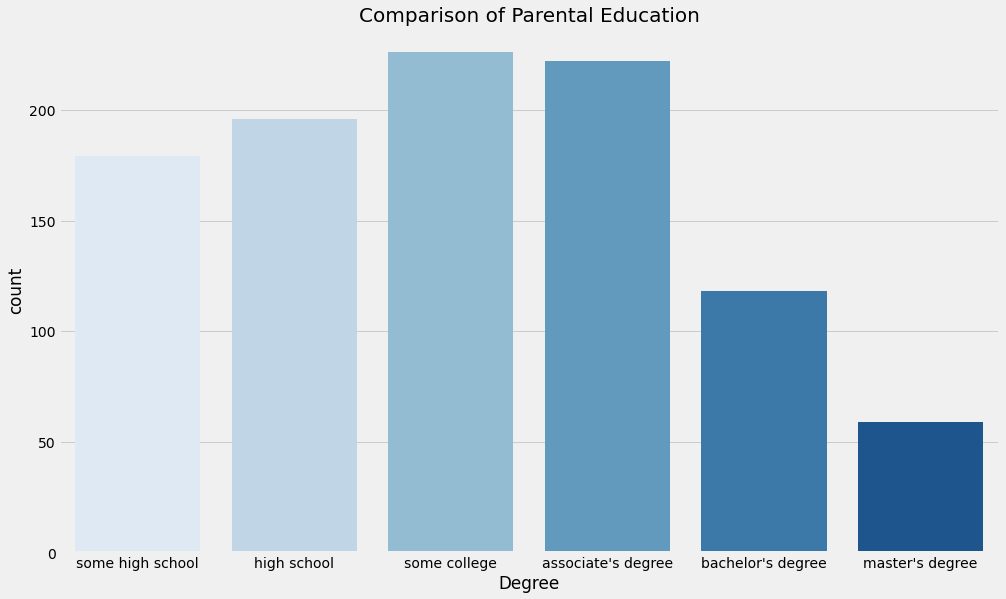

In [51]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

From the graph it is clear that most of the parents were studied up to college and few only of them have a master's degree

# To find who scores the most on average for math, reading and writing based on gender and test preparation course


In [52]:
df[['gender','math score','writing score',
      'reading score']].groupby(['gender']).agg('median')

,math score,writing score,reading score
gender,,,
female,65,74,73
male,69,64,66


In [53]:
df[['test preparation course','math score','writing score',
      'reading score']].groupby(['test preparation course']).agg('median')

,math score,writing score,reading score
test preparation course,,,
completed,70,76,75
none,64,65,67


Based on gender: males students scored more than female students
Based on test preparation course: The Higher scores are obtained by students who participated in test preparation course

# scoring variation for math, reading and writing based on gender and test preparation course

In [54]:
df[['gender','math score','writing score',
      'reading score']].groupby(['gender']).agg('std')

,math score,writing score,reading score
gender,,,
female,16.029928,14.844842,14.411018
male,14.556411,14.227225,14.149594


In [55]:
df[['test preparation course','math score','writing score',
      'reading score']].groupby(['test preparation course']).agg('std')

,math score,writing score,reading score
test preparation course,,,
completed,14.521847,13.236412,13.537572
none,15.705689,15.041667,14.608896


# top 25% of students based on their maths score

In [58]:
top_25=df.sort_values('math score', ascending=False)

In [57]:
top_25.quantile(0.75, axis=0)

math score       77.00
reading score    79.25
writing score    79.00
Name: 0.75, dtype: float64

In [59]:
top_25=df[df['math score']>77]

In [60]:
top_25

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
430,female,group A,some college,standard,completed,78,87,91
431,female,group B,bachelor's degree,free/reduced,none,78,79,76
432,female,group D,bachelor's degree,standard,none,78,82,79
433,female,group D,high school,standard,none,78,81,80
434,female,group D,bachelor's degree,free/reduced,none,78,90,93
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
